# Data Preparation

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:

iris = load_iris()

In [3]:
x = iris.data
y = iris.target
xtrain ,xtest, ytrain , ytest = train_test_split(x,y , test_size = 0.2, random_state = 42)


# Network Architecture

In [4]:
class NeuralNetwork:
  def __init__ (self, n_input, n_hidden, n_output, activation = 'tanh'):
    self.input = n_input
    self.hidden = n_hidden
    self.output = n_output
    self.activation = activation


    self.weights_input_hidden = np.random.randn(self.input, self.hidden)
    self.bias_input_hidden = np.random.randn(1, self.hidden)
    self.weights_hidden_output = np.random.randn(self.hidden, self.output)
    self.bias_hidden_output = np.random.randn(1, self.output)




  def tanh(self, x):
    return np.tanh(x)

  def tanh_derivative(self, x):
    return 1- np.tanh(x)**2

  def softmax(self, x):
    exp_values = np.exp(x-np.max(x, axis=1, keepdims=True))
    return exp_values / np.sum(exp_values, axis = 1, keepdims=True)




  def forward_propagation(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_input_hidden
        self.hidden_output = self.tanh(self.hidden_input)
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output
        self.output_output = self.softmax(self.output_input)
        return self.output_output



  def backward_propagation(self, X, y, learning_rate=0.01):
        m = len(X)


        d_error_output = self.output_output - np.eye(self.output)[y]
        d_output_input = d_error_output


        self.weights_hidden_output -= learning_rate * np.dot(self.hidden_output.T, d_output_input) / m
        self.bias_hidden_output -= learning_rate * np.sum(d_output_input, axis=0) / m


        d_error_hidden = np.dot(d_output_input, self.weights_hidden_output.T)
        d_hidden_input = d_error_hidden * self.tanh_derivative(self.hidden_input)


        self.weights_input_hidden -= learning_rate * np.dot(X.T, d_hidden_input) / m
        self.bias_input_hidden -= learning_rate * np.sum(d_hidden_input, axis=0) / m


  def train(self, X, y, epochs=100, learning_rate=0.01):
        for epoch in range(epochs):
            output = self.forward_propagation(X)
            self.backward_propagation(X, y, learning_rate)
            if epoch % 10 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {self.loss(output, y)}')

  def loss(self, output, y):
        m = len(output)
        log_likelihood = -np.log(output[range(m), y])
        loss = np.sum(log_likelihood) / m
        return loss

  def predict(self, X):
        return np.argmax(self.forward_propagation(X), axis=1)


# Initialize the neural network

In [5]:
n_input = xtrain.shape[1]
n_hidden = 5  # Number of neurons in the hidden layer
n_output = len(np.unique(ytrain))  # Number of classes
nn = NeuralNetwork(n_input, n_hidden, n_output)


# Train the neural network

In [6]:
nn.train(xtrain, ytrain, epochs=1000, learning_rate=0.1)

Epoch 1/1000, Loss: 3.276083278375927
Epoch 11/1000, Loss: 1.1479246075626373
Epoch 21/1000, Loss: 1.1010788996900123
Epoch 31/1000, Loss: 1.0987874069457249
Epoch 41/1000, Loss: 1.0978035658671663
Epoch 51/1000, Loss: 1.096866704718014
Epoch 61/1000, Loss: 1.0955650795535556
Epoch 71/1000, Loss: 1.092838043796553
Epoch 81/1000, Loss: 1.0807700929938748
Epoch 91/1000, Loss: 0.897085064232656
Epoch 101/1000, Loss: 0.68887294577276
Epoch 111/1000, Loss: 0.6223671781925026
Epoch 121/1000, Loss: 0.5877514714223913
Epoch 131/1000, Loss: 0.5645665960591609
Epoch 141/1000, Loss: 0.5471721495530606
Epoch 151/1000, Loss: 0.5332755461794254
Epoch 161/1000, Loss: 0.5216726945691958
Epoch 171/1000, Loss: 0.5116257871997038
Epoch 181/1000, Loss: 0.5026441085242568
Epoch 191/1000, Loss: 0.4943888344994046
Epoch 201/1000, Loss: 0.48662361971138934
Epoch 211/1000, Loss: 0.47918523555941095
Epoch 221/1000, Loss: 0.47196433681597977
Epoch 231/1000, Loss: 0.46489187971286833
Epoch 241/1000, Loss: 0.45792

# Plot the decision boundary

In [7]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('Decision Boundary')
    plt.show()

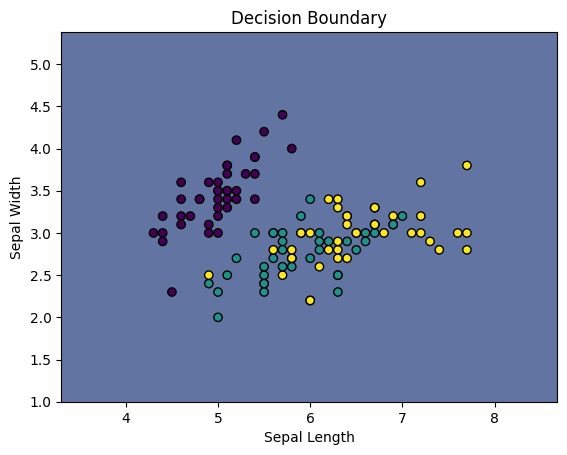

In [8]:
plot_decision_boundary(xtrain[:, :2], ytrain, nn)

# Experiment with different hyperparameters

Epoch 1/100, Loss: 1.848930282718069
Epoch 11/100, Loss: 1.8237102542070598
Epoch 21/100, Loss: 1.7990299740002433
Epoch 31/100, Loss: 1.774895674898693
Epoch 41/100, Loss: 1.7513127468977367
Epoch 51/100, Loss: 1.7282857053064415
Epoch 61/100, Loss: 1.705818164521973
Epoch 71/100, Loss: 1.6839128178090899
Epoch 81/100, Loss: 1.6625714233496685
Epoch 91/100, Loss: 1.6417947967354718
Learning Rate: 0.001, Epochs: 100, Activation: sigmoid


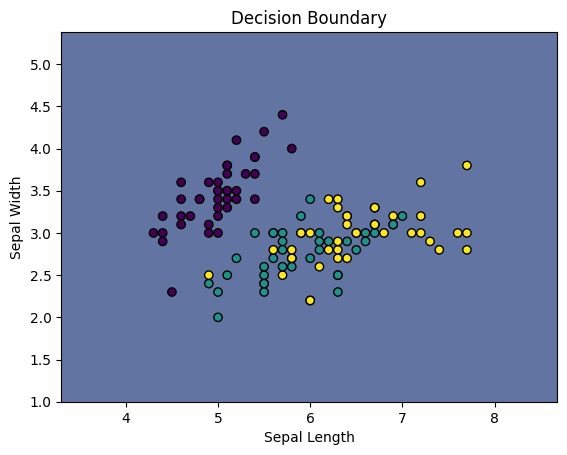

Epoch 1/100, Loss: 1.0939522185976227
Epoch 11/100, Loss: 0.8243853432013062
Epoch 21/100, Loss: 0.6775175149726981
Epoch 31/100, Loss: 0.6056241071316395
Epoch 41/100, Loss: 0.5674788318419425
Epoch 51/100, Loss: 0.5441464993903401
Epoch 61/100, Loss: 0.5281534232262445
Epoch 71/100, Loss: 0.5163145454090502
Epoch 81/100, Loss: 0.5070886712220167
Epoch 91/100, Loss: 0.49963703528260894
Learning Rate: 0.001, Epochs: 100, Activation: tanh


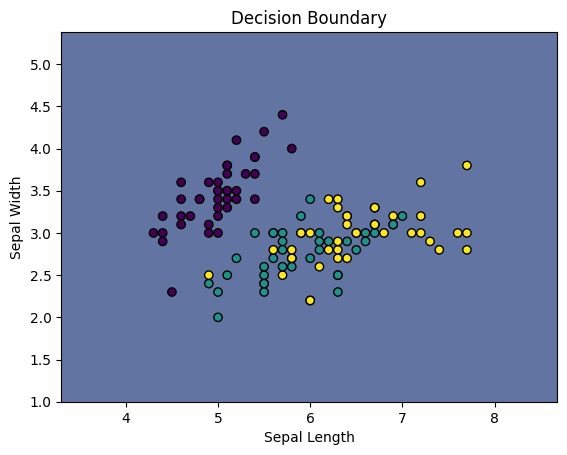

Epoch 1/100, Loss: 2.010941063816879
Epoch 11/100, Loss: 1.9835807673279482
Epoch 21/100, Loss: 1.9566913625071198
Epoch 31/100, Loss: 1.9302821832486368
Epoch 41/100, Loss: 1.9043620021104315
Epoch 51/100, Loss: 1.8789389817193747
Epoch 61/100, Loss: 1.8540206287946797
Epoch 71/100, Loss: 1.8296137513542545
Epoch 81/100, Loss: 1.8057244196436515
Epoch 91/100, Loss: 1.7823579312906013
Learning Rate: 0.001, Epochs: 100, Activation: relu


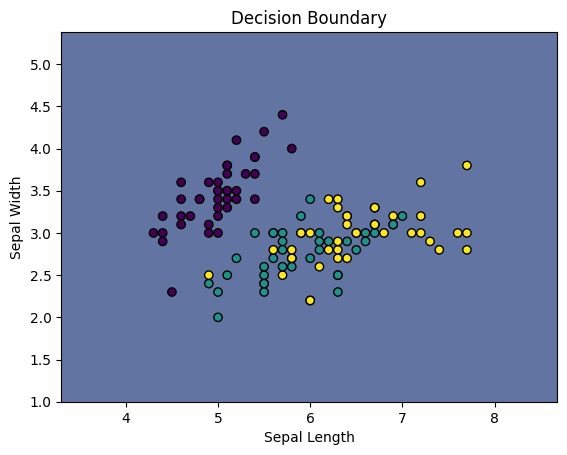

Epoch 1/500, Loss: 2.442464512493339
Epoch 11/500, Loss: 1.911467001763816
Epoch 21/500, Loss: 1.5541532591168958
Epoch 31/500, Loss: 1.3930990874898805
Epoch 41/500, Loss: 1.313068428090861
Epoch 51/500, Loss: 1.2661493692653565
Epoch 61/500, Loss: 1.235304960783068
Epoch 71/500, Loss: 1.2133495906195197
Epoch 81/500, Loss: 1.1967789101246746
Epoch 91/500, Loss: 1.1836973306752592
Epoch 101/500, Loss: 1.1729981324902368
Epoch 111/500, Loss: 1.1639958841189815
Epoch 121/500, Loss: 1.1562454523351504
Epoch 131/500, Loss: 1.1494461849003126
Epoch 141/500, Loss: 1.14338815343527
Epoch 151/500, Loss: 1.1379205179213798
Epoch 161/500, Loss: 1.1329321462313302
Epoch 171/500, Loss: 1.1283393260858787
Epoch 181/500, Loss: 1.1240777382019602
Epoch 191/500, Loss: 1.1200970741482716
Epoch 201/500, Loss: 1.1163573431152674
Epoch 211/500, Loss: 1.112826284810961
Epoch 221/500, Loss: 1.1094775233056895
Epoch 231/500, Loss: 1.1062892273577942
Epoch 241/500, Loss: 1.1032431233365003
Epoch 251/500, Los

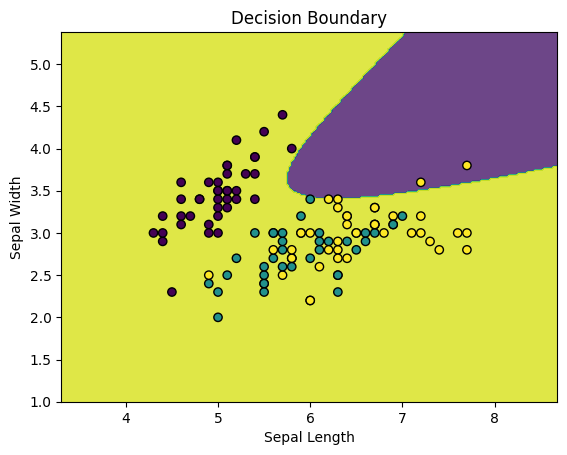

Epoch 1/500, Loss: 2.6503998258994272
Epoch 11/500, Loss: 2.6142567410230773
Epoch 21/500, Loss: 2.577722440789667
Epoch 31/500, Loss: 2.5410198471229726
Epoch 41/500, Loss: 2.5044018076216465
Epoch 51/500, Loss: 2.4681286597811476
Epoch 61/500, Loss: 2.4324442699424287
Epoch 71/500, Loss: 2.3975559245058444
Epoch 81/500, Loss: 2.3636218748244042
Epoch 91/500, Loss: 2.3307475757247107
Epoch 101/500, Loss: 2.298989173822926
Epoch 111/500, Loss: 2.2683615300641384
Epoch 121/500, Loss: 2.238848039433277
Epoch 131/500, Loss: 2.2104102232238168
Epoch 141/500, Loss: 2.1829959534507415
Epoch 151/500, Loss: 2.156545888553495
Epoch 161/500, Loss: 2.130998153690572
Epoch 171/500, Loss: 2.1062915221809506
Epoch 181/500, Loss: 2.082367423951019
Epoch 191/500, Loss: 2.0591710922528335
Epoch 201/500, Loss: 2.03665210947873
Epoch 211/500, Loss: 2.014764554128995
Epoch 221/500, Loss: 1.9934668971546912
Epoch 231/500, Loss: 1.9727217518707092
Epoch 241/500, Loss: 1.9524955479921655
Epoch 251/500, Loss:

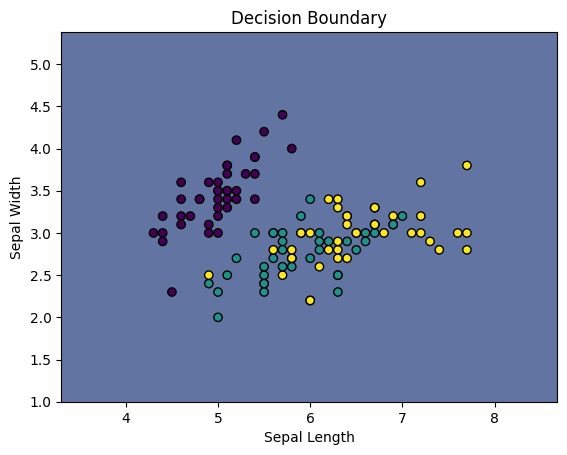

Epoch 1/500, Loss: 3.144237881403962
Epoch 11/500, Loss: 3.1085799240464156
Epoch 21/500, Loss: 3.0730205547943483
Epoch 31/500, Loss: 3.0375446476469548
Epoch 41/500, Loss: 3.0021314803215784
Epoch 51/500, Loss: 2.9667528681970916
Epoch 61/500, Loss: 2.9313705404916184
Epoch 71/500, Loss: 2.8959323801920656
Epoch 81/500, Loss: 2.860366921487136
Epoch 91/500, Loss: 2.824575108149488
Epoch 101/500, Loss: 2.7884176276417603
Epoch 111/500, Loss: 2.7516948816646307
Epoch 121/500, Loss: 2.714114292223985
Epoch 131/500, Loss: 2.6752350374534526
Epoch 141/500, Loss: 2.634371024860841
Epoch 151/500, Loss: 2.5904136667296673
Epoch 161/500, Loss: 2.5414958967205243
Epoch 171/500, Loss: 2.4843398259667686
Epoch 181/500, Loss: 2.4130160638750824
Epoch 191/500, Loss: 2.316955185335116
Epoch 201/500, Loss: 2.17999403067255
Epoch 211/500, Loss: 1.990090470533174
Epoch 221/500, Loss: 1.7719672837257292
Epoch 231/500, Loss: 1.5895067579736732
Epoch 241/500, Loss: 1.4704634323421735
Epoch 251/500, Loss:

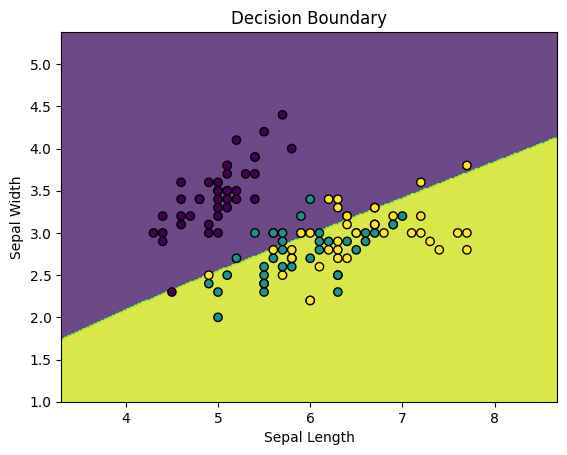

Epoch 1/1000, Loss: 3.1942678069639774
Epoch 11/1000, Loss: 3.1367009170570572
Epoch 21/1000, Loss: 3.0857450296081654
Epoch 31/1000, Loss: 3.039731751856096
Epoch 41/1000, Loss: 2.9973639918593222
Epoch 51/1000, Loss: 2.957709103589201
Epoch 61/1000, Loss: 2.9201158001372525
Epoch 71/1000, Loss: 2.8841318247091863
Epoch 81/1000, Loss: 2.849441316540676
Epoch 91/1000, Loss: 2.8158212455403535
Epoch 101/1000, Loss: 2.7831120681113495
Epoch 111/1000, Loss: 2.7511981056080463
Epoch 121/1000, Loss: 2.71999436389172
Epoch 131/1000, Loss: 2.689437586981553
Epoch 141/1000, Loss: 2.659480104202684
Epoch 151/1000, Loss: 2.6300855378344408
Epoch 161/1000, Loss: 2.601225765257205
Epoch 171/1000, Loss: 2.5728787386760654
Epoch 181/1000, Loss: 2.545026899520886
Epoch 191/1000, Loss: 2.5176560111950157
Epoch 201/1000, Loss: 2.4907542903513753
Epoch 211/1000, Loss: 2.464311754190362
Epoch 221/1000, Loss: 2.4383197262188685
Epoch 231/1000, Loss: 2.4127704597899213
Epoch 241/1000, Loss: 2.3876568503030

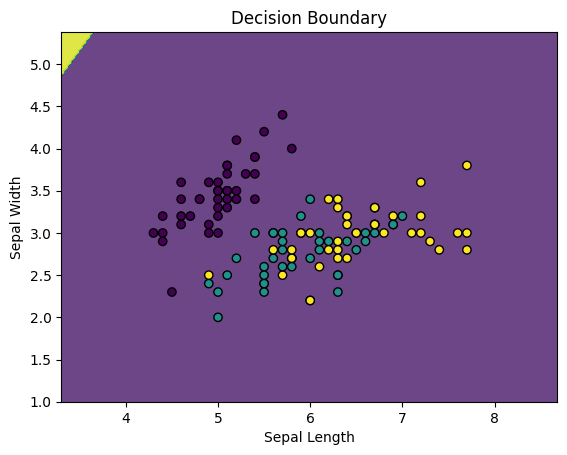

Epoch 1/1000, Loss: 1.2791975096588748
Epoch 11/1000, Loss: 1.2720842484757058
Epoch 21/1000, Loss: 1.2652547976209656
Epoch 31/1000, Loss: 1.2586991260623308
Epoch 41/1000, Loss: 1.2524074064150483
Epoch 51/1000, Loss: 1.2463700265371345
Epoch 61/1000, Loss: 1.2405775992468284
Epoch 71/1000, Loss: 1.2350209702800232
Epoch 81/1000, Loss: 1.2296912246082787
Epoch 91/1000, Loss: 1.2245796912390812
Epoch 101/1000, Loss: 1.2196779466195091
Epoch 111/1000, Loss: 1.2149778167625815
Epoch 121/1000, Loss: 1.2104713782125875
Epoch 131/1000, Loss: 1.2061509579617862
Epoch 141/1000, Loss: 1.2020091324262447
Epoch 151/1000, Loss: 1.1980387255834013
Epoch 161/1000, Loss: 1.1942328063683714
Epoch 171/1000, Loss: 1.1905846854201791
Epoch 181/1000, Loss: 1.1870879112631154
Epoch 191/1000, Loss: 1.1837362660024022
Epoch 201/1000, Loss: 1.1805237606073533
Epoch 211/1000, Loss: 1.17744462984935
Epoch 221/1000, Loss: 1.1744933269562323
Epoch 231/1000, Loss: 1.1716645180392082
Epoch 241/1000, Loss: 1.16895

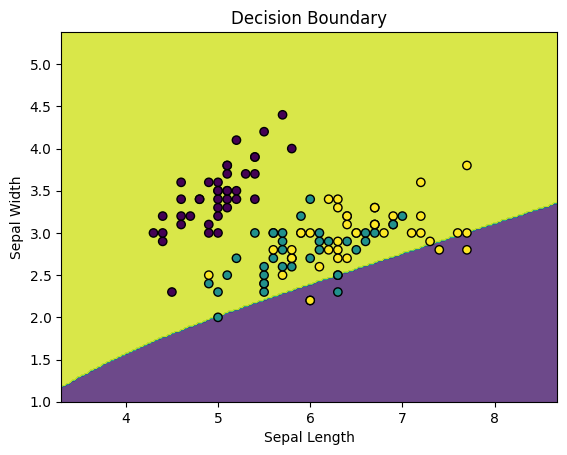

Epoch 1/1000, Loss: 4.688183506682467
Epoch 11/1000, Loss: 4.656739837388309
Epoch 21/1000, Loss: 4.6248574498456065
Epoch 31/1000, Loss: 4.592381697783144
Epoch 41/1000, Loss: 4.559105179969334
Epoch 51/1000, Loss: 4.524744889077202
Epoch 61/1000, Loss: 4.488907044903937
Epoch 71/1000, Loss: 4.451031641208602
Epoch 81/1000, Loss: 4.410302743072451
Epoch 91/1000, Loss: 4.365499576769519
Epoch 101/1000, Loss: 4.314743237495617
Epoch 111/1000, Loss: 4.255057779564397
Epoch 121/1000, Loss: 4.181608050355468
Epoch 131/1000, Loss: 4.08643488221211
Epoch 141/1000, Loss: 3.9567690257226307
Epoch 151/1000, Loss: 3.7750330139779593
Epoch 161/1000, Loss: 3.530152476757798
Epoch 171/1000, Loss: 3.250683537284149
Epoch 181/1000, Loss: 3.0059046346681626
Epoch 191/1000, Loss: 2.831613261183798
Epoch 201/1000, Loss: 2.7148512897545505
Epoch 211/1000, Loss: 2.6339288239063694
Epoch 221/1000, Loss: 2.574214510595625
Epoch 231/1000, Loss: 2.527381664046687
Epoch 241/1000, Loss: 2.4887561624153554
Epoch

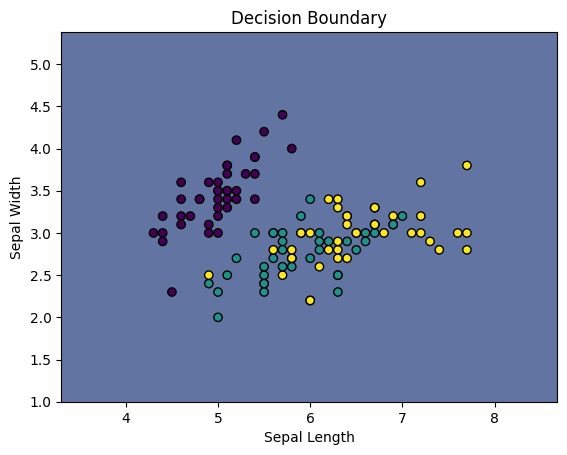

Epoch 1/100, Loss: 2.677272755393629
Epoch 11/100, Loss: 2.2359483960526547
Epoch 21/100, Loss: 1.997795785551728
Epoch 31/100, Loss: 1.765201548164376
Epoch 41/100, Loss: 1.4849466193526488
Epoch 51/100, Loss: 1.3094260253251226
Epoch 61/100, Loss: 1.183434917479409
Epoch 71/100, Loss: 1.0806755645726838
Epoch 81/100, Loss: 0.9944628230218151
Epoch 91/100, Loss: 0.9211954684788758
Learning Rate: 0.01, Epochs: 100, Activation: sigmoid


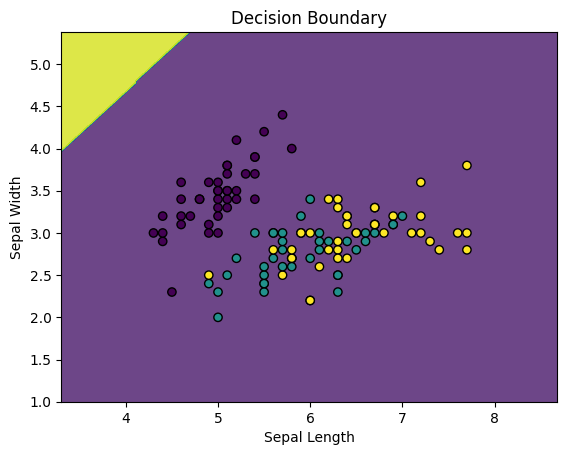

Epoch 1/100, Loss: 2.566864615849702
Epoch 11/100, Loss: 2.0316742862127217
Epoch 21/100, Loss: 1.0399831028911455
Epoch 31/100, Loss: 0.8608377229023864
Epoch 41/100, Loss: 0.7427828294244828
Epoch 51/100, Loss: 0.6842150984601304
Epoch 61/100, Loss: 0.6551854949540125
Epoch 71/100, Loss: 0.6377177689050719
Epoch 81/100, Loss: 0.6253649836519497
Epoch 91/100, Loss: 0.6157432642537003
Learning Rate: 0.01, Epochs: 100, Activation: tanh


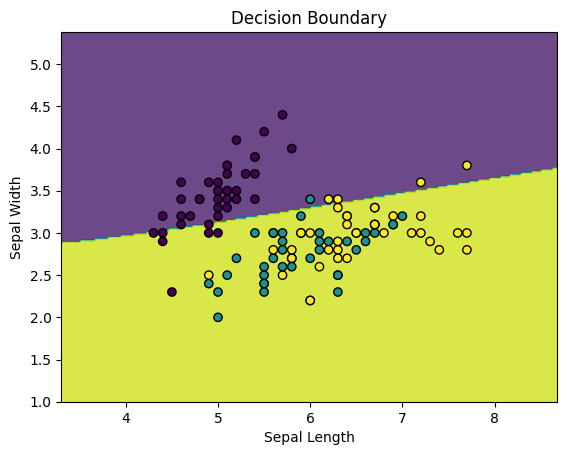

Epoch 1/100, Loss: 1.9770863549331705
Epoch 11/100, Loss: 1.7570153639508623
Epoch 21/100, Loss: 1.5297639106388503
Epoch 31/100, Loss: 0.9034001088143261
Epoch 41/100, Loss: 0.8370141142783513
Epoch 51/100, Loss: 0.8102556325195821
Epoch 61/100, Loss: 0.7902038862476305
Epoch 71/100, Loss: 0.7744727622575148
Epoch 81/100, Loss: 0.7615671530835594
Epoch 91/100, Loss: 0.7505464028253864
Learning Rate: 0.01, Epochs: 100, Activation: relu


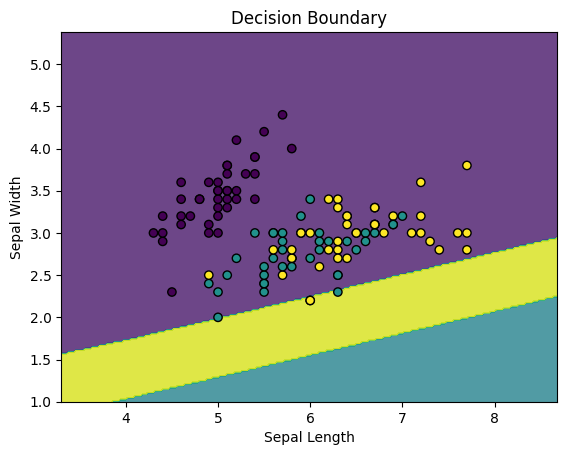

Epoch 1/500, Loss: 2.535127589806671
Epoch 11/500, Loss: 1.105808938720294
Epoch 21/500, Loss: 1.002609924303677
Epoch 31/500, Loss: 0.9480654789555316
Epoch 41/500, Loss: 0.906827078931277
Epoch 51/500, Loss: 0.8745208603604705
Epoch 61/500, Loss: 0.8487073290796571
Epoch 71/500, Loss: 0.8276560432817274
Epoch 81/500, Loss: 0.8101126985196064
Epoch 91/500, Loss: 0.7951690414334223
Epoch 101/500, Loss: 0.7821689832130436
Epoch 111/500, Loss: 0.7706392950704771
Epoch 121/500, Loss: 0.7602387587549925
Epoch 131/500, Loss: 0.7507211318947017
Epoch 141/500, Loss: 0.7419083281826553
Epoch 151/500, Loss: 0.7336710743446944
Epoch 161/500, Loss: 0.7259150005927026
Epoch 171/500, Loss: 0.7185706606659189
Epoch 181/500, Loss: 0.7115863848395705
Epoch 191/500, Loss: 0.7049231710265399
Epoch 201/500, Loss: 0.6985510399058575
Epoch 211/500, Loss: 0.6924464403460878
Epoch 221/500, Loss: 0.6865904072904684
Epoch 231/500, Loss: 0.6809672578529246
Epoch 241/500, Loss: 0.6755636715920638
Epoch 251/500, 

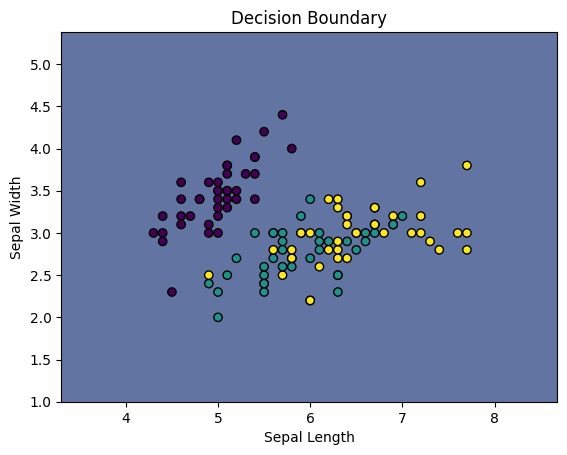

Epoch 1/500, Loss: 4.288043277381937
Epoch 11/500, Loss: 3.9081235596518877
Epoch 21/500, Loss: 3.5413199075227917
Epoch 31/500, Loss: 3.19466670811919
Epoch 41/500, Loss: 2.8766785087969784
Epoch 51/500, Loss: 2.5952212481815646
Epoch 61/500, Loss: 2.3542714862343956
Epoch 71/500, Loss: 2.151907772641125
Epoch 81/500, Loss: 1.981542409559231
Epoch 91/500, Loss: 1.8352225180641923
Epoch 101/500, Loss: 1.706256812706719
Epoch 111/500, Loss: 1.590077595335426
Epoch 121/500, Loss: 1.483972123748369
Epoch 131/500, Loss: 1.3865170758103185
Epoch 141/500, Loss: 1.2970931742804568
Epoch 151/500, Loss: 1.2155361871543273
Epoch 161/500, Loss: 1.141885913488802
Epoch 171/500, Loss: 1.0761992422752849
Epoch 181/500, Loss: 1.0184156743163857
Epoch 191/500, Loss: 0.9682775299671343
Epoch 201/500, Loss: 0.925307851263492
Epoch 211/500, Loss: 0.8888401198762278
Epoch 221/500, Loss: 0.8580829175101959
Epoch 231/500, Loss: 0.8321970086718312
Epoch 241/500, Loss: 0.8103648554040709
Epoch 251/500, Loss: 

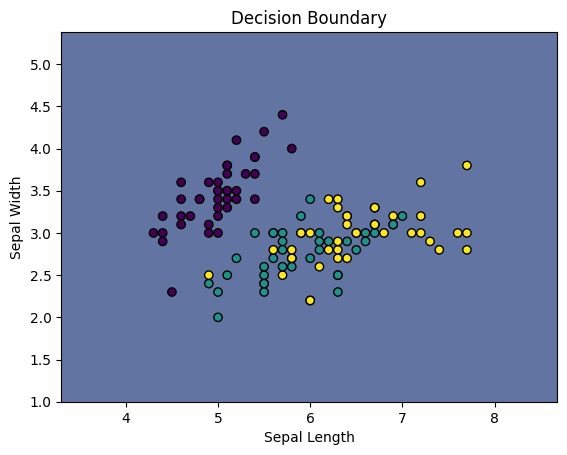

Epoch 1/500, Loss: 2.669495269971902
Epoch 11/500, Loss: 2.283750884921925
Epoch 21/500, Loss: 1.9725602444533596
Epoch 31/500, Loss: 1.7211060703740177
Epoch 41/500, Loss: 1.529065586831776
Epoch 51/500, Loss: 1.3906929221107072
Epoch 61/500, Loss: 1.2952115492624685
Epoch 71/500, Loss: 1.2309379737388217
Epoch 81/500, Loss: 1.1881157989750089
Epoch 91/500, Loss: 1.15963724857006
Epoch 101/500, Loss: 1.140657199847172
Epoch 111/500, Loss: 1.1279619191599588
Epoch 121/500, Loss: 1.1194356735697653
Epoch 131/500, Loss: 1.1136841609077919
Epoch 141/500, Loss: 1.1097851028310892
Epoch 151/500, Loss: 1.1071260995033052
Epoch 161/500, Loss: 1.10529923228053
Epoch 171/500, Loss: 1.1040321416113732
Epoch 181/500, Loss: 1.1031426513296807
Epoch 191/500, Loss: 1.1025087282205375
Epoch 201/500, Loss: 1.1020485144455594
Epoch 211/500, Loss: 1.1017070200218313
Epoch 221/500, Loss: 1.1014472390090027
Epoch 231/500, Loss: 1.101244212639185
Epoch 241/500, Loss: 1.101081059128927
Epoch 251/500, Loss: 

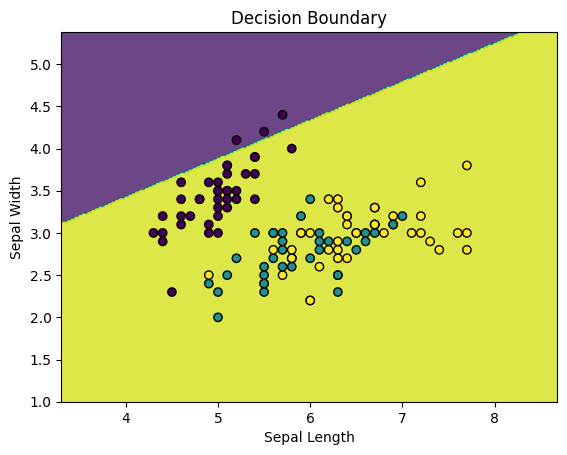

Epoch 1/1000, Loss: 1.7896317984919061
Epoch 11/1000, Loss: 1.6568888897931884
Epoch 21/1000, Loss: 1.5480024730869635
Epoch 31/1000, Loss: 1.4575326752357138
Epoch 41/1000, Loss: 1.3828057613349825
Epoch 51/1000, Loss: 1.3217321056863214
Epoch 61/1000, Loss: 1.2723815445232665
Epoch 71/1000, Loss: 1.2329304576938738
Epoch 81/1000, Loss: 1.2016962332724943
Epoch 91/1000, Loss: 1.1771756993719182
Epoch 101/1000, Loss: 1.158062925566339
Epoch 111/1000, Loss: 1.1432484325756254
Epoch 121/1000, Loss: 1.1318074531560625
Epoch 131/1000, Loss: 1.1229825421538604
Epoch 141/1000, Loss: 1.1161633565460187
Epoch 151/1000, Loss: 1.110865326526853
Epoch 161/1000, Loss: 1.106708570783271
Epoch 171/1000, Loss: 1.103398153247502
Epoch 181/1000, Loss: 1.1007064392180972
Epoch 191/1000, Loss: 1.098457929815774
Epoch 201/1000, Loss: 1.096516623427877
Epoch 211/1000, Loss: 1.0947757208114188
Epoch 221/1000, Loss: 1.0931493623046928
Epoch 231/1000, Loss: 1.0915660421802877
Epoch 241/1000, Loss: 1.089963362

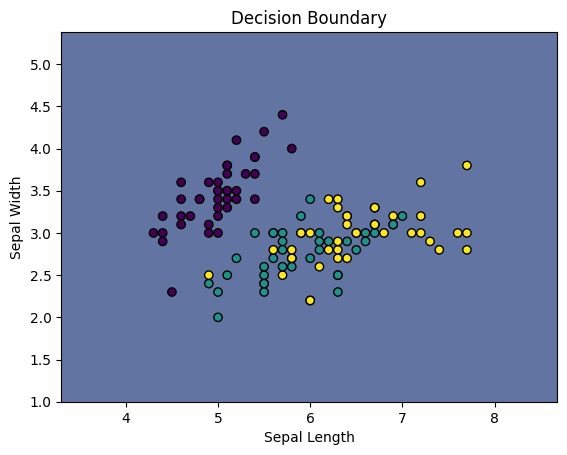

Epoch 1/1000, Loss: 2.9114211534647088
Epoch 11/1000, Loss: 1.6230463956174002
Epoch 21/1000, Loss: 1.5157403415812611
Epoch 31/1000, Loss: 1.4339096040197623
Epoch 41/1000, Loss: 1.3650141654165637
Epoch 51/1000, Loss: 1.3066868724061294
Epoch 61/1000, Loss: 1.2580198398926246
Epoch 71/1000, Loss: 1.218293944696069
Epoch 81/1000, Loss: 1.1866525696233456
Epoch 91/1000, Loss: 1.162059798383368
Epoch 101/1000, Loss: 1.1433738260558068
Epoch 111/1000, Loss: 1.1294526070051234
Epoch 121/1000, Loss: 1.1192444059659288
Epoch 131/1000, Loss: 1.1118433222773079
Epoch 141/1000, Loss: 1.106509399603227
Epoch 151/1000, Loss: 1.1026627143726002
Epoch 161/1000, Loss: 1.099862776433263
Epoch 171/1000, Loss: 1.097782353689863
Epoch 181/1000, Loss: 1.0961814733996689
Epoch 191/1000, Loss: 1.094884449867936
Epoch 201/1000, Loss: 1.0937608142627455
Epoch 211/1000, Loss: 1.0927098792529648
Epoch 221/1000, Loss: 1.0916480812518818
Epoch 231/1000, Loss: 1.0904979320231978
Epoch 241/1000, Loss: 1.089177160

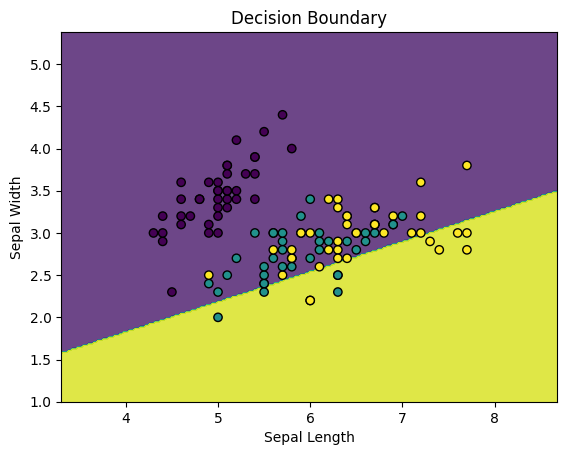

Epoch 1/1000, Loss: 3.6070302882931204
Epoch 11/1000, Loss: 2.3827478427718747
Epoch 21/1000, Loss: 1.93781591945131
Epoch 31/1000, Loss: 1.6344275391584324
Epoch 41/1000, Loss: 1.3957354667304362
Epoch 51/1000, Loss: 1.2405301772799737
Epoch 61/1000, Loss: 1.129981338712448
Epoch 71/1000, Loss: 1.044009125778387
Epoch 81/1000, Loss: 0.9764053687500901
Epoch 91/1000, Loss: 0.9228033274929115
Epoch 101/1000, Loss: 0.8792762598916044
Epoch 111/1000, Loss: 0.8429768062300769
Epoch 121/1000, Loss: 0.8119793334345492
Epoch 131/1000, Loss: 0.7849889755135568
Epoch 141/1000, Loss: 0.7610895091929664
Epoch 151/1000, Loss: 0.7395841018668545
Epoch 161/1000, Loss: 0.7199169738847679
Epoch 171/1000, Loss: 0.7016365200192013
Epoch 181/1000, Loss: 0.6843741123384958
Epoch 191/1000, Loss: 0.6678293841825425
Epoch 201/1000, Loss: 0.6517597367781157
Epoch 211/1000, Loss: 0.6359733157891218
Epoch 221/1000, Loss: 0.6203247377552723
Epoch 231/1000, Loss: 0.6047126951122489
Epoch 241/1000, Loss: 0.5890784

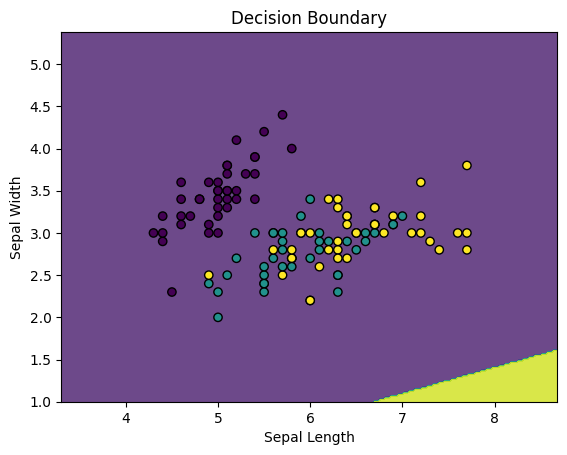

Epoch 1/100, Loss: 1.3295387837768717
Epoch 11/100, Loss: 1.097788076357737
Epoch 21/100, Loss: 1.0909449452882645
Epoch 31/100, Loss: 1.075321993653575
Epoch 41/100, Loss: 1.0323860222539607
Epoch 51/100, Loss: 0.9857784572897675
Epoch 61/100, Loss: 0.9273403111363265
Epoch 71/100, Loss: 1.1261053362663291
Epoch 81/100, Loss: 1.0951076202382926
Epoch 91/100, Loss: 1.0907364736519436
Learning Rate: 0.1, Epochs: 100, Activation: sigmoid


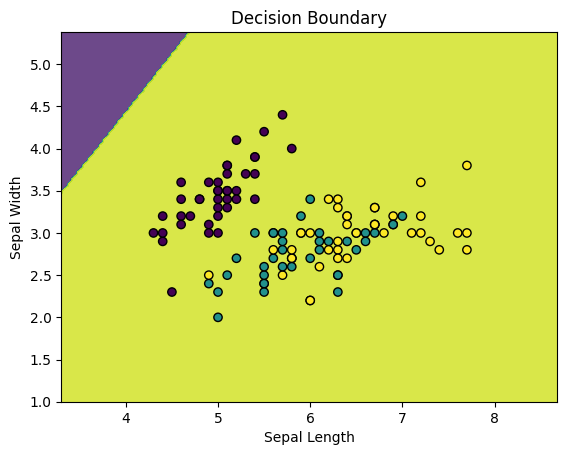

Epoch 1/100, Loss: 1.4418518104135833
Epoch 11/100, Loss: 1.102331342180171
Epoch 21/100, Loss: 1.1000296467178396
Epoch 31/100, Loss: 1.0996438293031607
Epoch 41/100, Loss: 1.0994144240037305
Epoch 51/100, Loss: 1.0992575258991262
Epoch 61/100, Loss: 1.0991432238802046
Epoch 71/100, Loss: 1.0990561595417536
Epoch 81/100, Loss: 1.098987586089376
Epoch 91/100, Loss: 1.0989321502043603
Learning Rate: 0.1, Epochs: 100, Activation: tanh


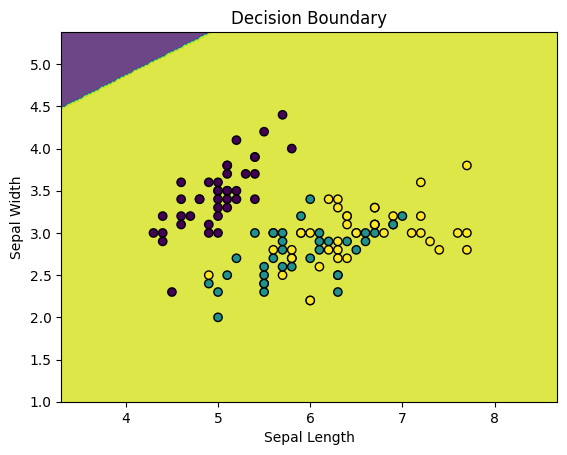

Epoch 1/100, Loss: 2.7366018627266686
Epoch 11/100, Loss: 0.9429983715000354
Epoch 21/100, Loss: 0.6793531879851173
Epoch 31/100, Loss: 0.6292550958367976
Epoch 41/100, Loss: 0.6001018460628393
Epoch 51/100, Loss: 0.5792725924269395
Epoch 61/100, Loss: 0.5636495018621749
Epoch 71/100, Loss: 0.5515385177023429
Epoch 81/100, Loss: 0.5419012582453268
Epoch 91/100, Loss: 0.5340661688408487
Learning Rate: 0.1, Epochs: 100, Activation: relu


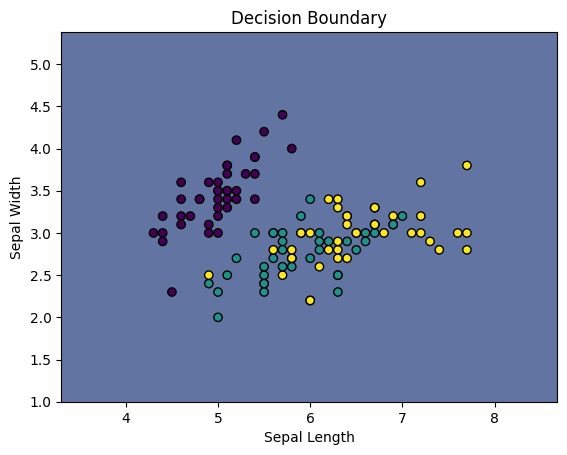

Epoch 1/500, Loss: 2.416962136855514
Epoch 11/500, Loss: 0.8188373863193698
Epoch 21/500, Loss: 0.7314976631537322
Epoch 31/500, Loss: 0.6741574183824969
Epoch 41/500, Loss: 0.634820837680251
Epoch 51/500, Loss: 0.6068900680777406
Epoch 61/500, Loss: 0.5862786797107764
Epoch 71/500, Loss: 0.5705102990736817
Epoch 81/500, Loss: 0.558066329013975
Epoch 91/500, Loss: 0.5479919246015559
Epoch 101/500, Loss: 0.5396683598642781
Epoch 111/500, Loss: 0.5326807265655245
Epoch 121/500, Loss: 0.5267401184251285
Epoch 131/500, Loss: 0.5216376227561973
Epoch 141/500, Loss: 0.5172169790316522
Epoch 151/500, Loss: 0.5133580652832621
Epoch 161/500, Loss: 0.5099665978509772
Epoch 171/500, Loss: 0.5069674163127499
Epoch 181/500, Loss: 0.5042998940869132
Epoch 191/500, Loss: 0.5019146668767536
Epoch 201/500, Loss: 0.49977122185048517
Epoch 211/500, Loss: 0.4978360774530041
Epoch 221/500, Loss: 0.4960813852119531
Epoch 231/500, Loss: 0.49448384223706837
Epoch 241/500, Loss: 0.49302383736981953
Epoch 251/5

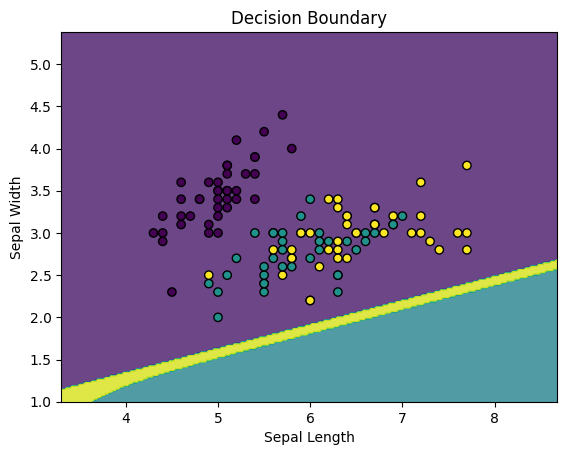

Epoch 1/500, Loss: 2.601577055064327
Epoch 11/500, Loss: 1.1555386091358237
Epoch 21/500, Loss: 1.0841155606846944
Epoch 31/500, Loss: 0.8235086159199771
Epoch 41/500, Loss: 0.6376999169210044
Epoch 51/500, Loss: 0.5921297425433235
Epoch 61/500, Loss: 0.569640292757951
Epoch 71/500, Loss: 0.554589216319098
Epoch 81/500, Loss: 0.5430220253844781
Epoch 91/500, Loss: 0.5329605653053886
Epoch 101/500, Loss: 0.5219808567382151
Epoch 111/500, Loss: 0.5104262055282693
Epoch 121/500, Loss: 0.5023782006425768
Epoch 131/500, Loss: 0.49624756835615125
Epoch 141/500, Loss: 0.49092749896343135
Epoch 151/500, Loss: 0.4860243166498612
Epoch 161/500, Loss: 0.48134571888161815
Epoch 171/500, Loss: 0.47675721738477417
Epoch 181/500, Loss: 0.4721377783454023
Epoch 191/500, Loss: 0.4673600252820159
Epoch 201/500, Loss: 0.46227356589417623
Epoch 211/500, Loss: 0.45668373593939793
Epoch 221/500, Loss: 0.45032533961405313
Epoch 231/500, Loss: 0.4428509482263394
Epoch 241/500, Loss: 0.4338967159287603
Epoch 2

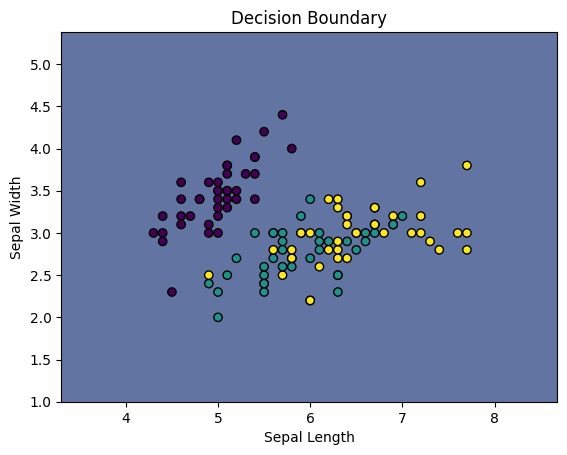

Epoch 1/500, Loss: 1.5284614336175286
Epoch 11/500, Loss: 0.5786778831102135
Epoch 21/500, Loss: 0.47129059022382286
Epoch 31/500, Loss: 0.4227761618428742
Epoch 41/500, Loss: 0.5112887913716265
Epoch 51/500, Loss: 0.472775280852875
Epoch 61/500, Loss: 0.39947780683132306
Epoch 71/500, Loss: 0.37764331775406057
Epoch 81/500, Loss: 0.34305631528410785
Epoch 91/500, Loss: 0.34096277910427986
Epoch 101/500, Loss: 0.40138149870301054
Epoch 111/500, Loss: 0.5167544365764759
Epoch 121/500, Loss: 0.37349886192954646
Epoch 131/500, Loss: 0.34803933789742025
Epoch 141/500, Loss: 0.48740204247240493
Epoch 151/500, Loss: 0.4581466190565198
Epoch 161/500, Loss: 0.3104142927089796
Epoch 171/500, Loss: 0.34319605069262626
Epoch 181/500, Loss: 0.20958841664861141
Epoch 191/500, Loss: 0.36173426040364837
Epoch 201/500, Loss: 0.1888820247859701
Epoch 211/500, Loss: 0.211273389577272
Epoch 221/500, Loss: 0.30665052670774057
Epoch 231/500, Loss: 0.48449176942942496
Epoch 241/500, Loss: 0.2882491181145836

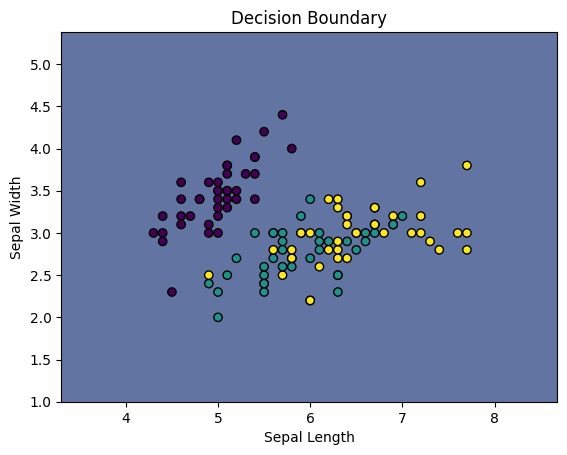

Epoch 1/1000, Loss: 1.355429140907025
Epoch 11/1000, Loss: 0.7320189508746966
Epoch 21/1000, Loss: 0.6537182249287256
Epoch 31/1000, Loss: 0.6128069468394483
Epoch 41/1000, Loss: 0.5852197030585856
Epoch 51/1000, Loss: 0.5645977864846885
Epoch 61/1000, Loss: 0.5482633105441491
Epoch 71/1000, Loss: 0.5347322198946755
Epoch 81/1000, Loss: 0.5230670716856807
Epoch 91/1000, Loss: 0.5126388054651584
Epoch 101/1000, Loss: 0.5030157939279316
Epoch 111/1000, Loss: 0.49390419231528554
Epoch 121/1000, Loss: 0.4851117849663839
Epoch 131/1000, Loss: 0.47652286465648513
Epoch 141/1000, Loss: 0.46807834030301065
Epoch 151/1000, Loss: 0.459758802367343
Epoch 161/1000, Loss: 0.4515701147417822
Epoch 171/1000, Loss: 0.4435317842195302
Epoch 181/1000, Loss: 0.43566832421170587
Epoch 191/1000, Loss: 0.4280034997651497
Epoch 201/1000, Loss: 0.42055712623575814
Epoch 211/1000, Loss: 0.4432618007505526
Epoch 221/1000, Loss: 0.4756130402260478
Epoch 231/1000, Loss: 0.4253044420397556
Epoch 241/1000, Loss: 0.

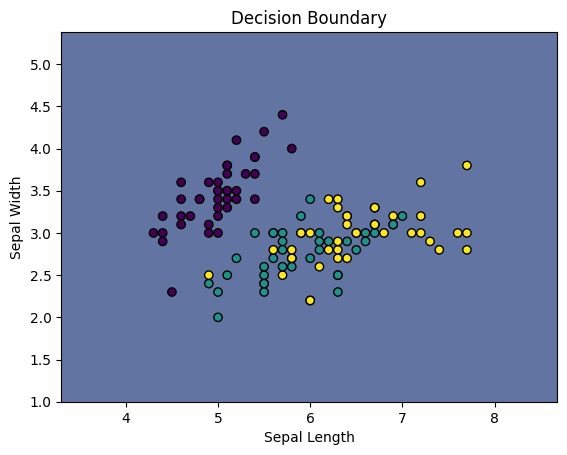

Epoch 1/1000, Loss: 3.47673807161558
Epoch 11/1000, Loss: 1.479130415205249
Epoch 21/1000, Loss: 1.1163708606238363
Epoch 31/1000, Loss: 1.097346422667477
Epoch 41/1000, Loss: 1.0965430476993114
Epoch 51/1000, Loss: 1.0956397447462958
Epoch 61/1000, Loss: 1.0939559376192867
Epoch 71/1000, Loss: 1.09022629864736
Epoch 81/1000, Loss: 1.0797408311448369
Epoch 91/1000, Loss: 1.050240576472625
Epoch 101/1000, Loss: 0.9858265020051662
Epoch 111/1000, Loss: 0.9081505382490332
Epoch 121/1000, Loss: 0.8383734799495197
Epoch 131/1000, Loss: 0.7797891326434692
Epoch 141/1000, Loss: 0.7311475071547472
Epoch 151/1000, Loss: 0.6900098380317724
Epoch 161/1000, Loss: 0.6543201253296551
Epoch 171/1000, Loss: 0.6235949750366437
Epoch 181/1000, Loss: 0.5981719000896537
Epoch 191/1000, Loss: 0.5777448450604934
Epoch 201/1000, Loss: 0.5614165329409444
Epoch 211/1000, Loss: 0.5482492142620095
Epoch 221/1000, Loss: 0.5374836924900861
Epoch 231/1000, Loss: 0.5285508984525189
Epoch 241/1000, Loss: 0.5210317322

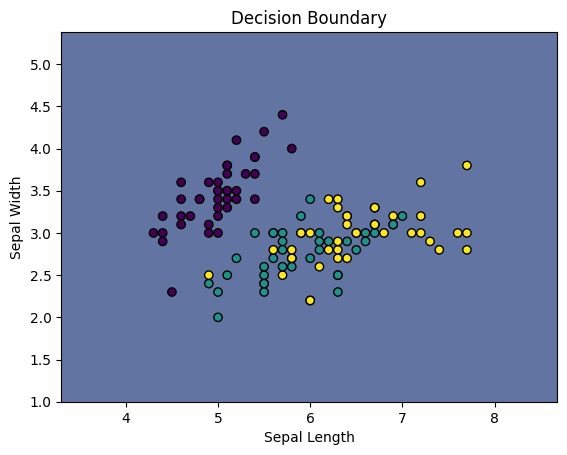

Epoch 1/1000, Loss: 1.9613250551955497
Epoch 11/1000, Loss: 0.7749824937381213
Epoch 21/1000, Loss: 0.6060380398238602
Epoch 31/1000, Loss: 0.5704342518536211
Epoch 41/1000, Loss: 0.5527758536578453
Epoch 51/1000, Loss: 0.5409509807163914
Epoch 61/1000, Loss: 0.5320937853761684
Epoch 71/1000, Loss: 0.5250954680726383
Epoch 81/1000, Loss: 0.5193898608264378
Epoch 91/1000, Loss: 0.5146371080196623
Epoch 101/1000, Loss: 0.5106129789040649
Epoch 111/1000, Loss: 0.5071606558183686
Epoch 121/1000, Loss: 0.5041661000192411
Epoch 131/1000, Loss: 0.5015439888895984
Epoch 141/1000, Loss: 0.4992290542369798
Epoch 151/1000, Loss: 0.4971704551485606
Epoch 161/1000, Loss: 0.49532797655023564
Epoch 171/1000, Loss: 0.49366938269037275
Epoch 181/1000, Loss: 0.49216852953995754
Epoch 191/1000, Loss: 0.4908039910518649
Epoch 201/1000, Loss: 0.489558041966875
Epoch 211/1000, Loss: 0.48841589315909834
Epoch 221/1000, Loss: 0.48736510905675995
Epoch 231/1000, Loss: 0.48639515839898007
Epoch 241/1000, Loss: 

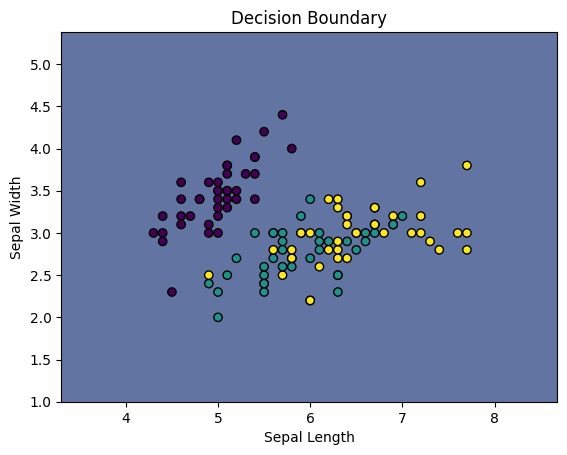

In [9]:
learning_rates = [0.001, 0.01, 0.1]
epochs = [100, 500, 1000]
activation_functions = ['sigmoid', 'tanh', 'relu']

for lr in learning_rates:
    for epoch in epochs:
        for activation_func in activation_functions:
            nn = NeuralNetwork(n_input, n_hidden, n_output, activation=activation_func)
            nn.train(xtrain, ytrain, epochs=epoch, learning_rate=lr)
            print(f'Learning Rate: {lr}, Epochs: {epoch}, Activation: {activation_func}')
            plot_decision_boundary(xtrain[:, :2], ytrain, nn)

# Plotting Final Boundary

Epoch 1/1000, Loss: 4.027443202789623
Epoch 11/1000, Loss: 1.118099380287662
Epoch 21/1000, Loss: 1.0913870419352099
Epoch 31/1000, Loss: 1.0698347672002095
Epoch 41/1000, Loss: 0.9209714109228269
Epoch 51/1000, Loss: 0.8055979774289932
Epoch 61/1000, Loss: 0.7171991336741113
Epoch 71/1000, Loss: 0.6570593906298735
Epoch 81/1000, Loss: 0.6168379691980661
Epoch 91/1000, Loss: 0.5890844244284755
Epoch 101/1000, Loss: 0.5691518111035665
Epoch 111/1000, Loss: 0.5542966834618741
Epoch 121/1000, Loss: 0.5428691531409466
Epoch 131/1000, Loss: 0.5338406439123488
Epoch 141/1000, Loss: 0.5265451924997887
Epoch 151/1000, Loss: 0.5205361048155699
Epoch 161/1000, Loss: 0.5155040279209612
Epoch 171/1000, Loss: 0.5112284248894566
Epoch 181/1000, Loss: 0.5075477787129149
Epoch 191/1000, Loss: 0.504340613086423
Epoch 201/1000, Loss: 0.501512893237926
Epoch 211/1000, Loss: 0.4989891767116456
Epoch 221/1000, Loss: 0.496705790441648
Epoch 231/1000, Loss: 0.49460464792541026
Epoch 241/1000, Loss: 0.4926261

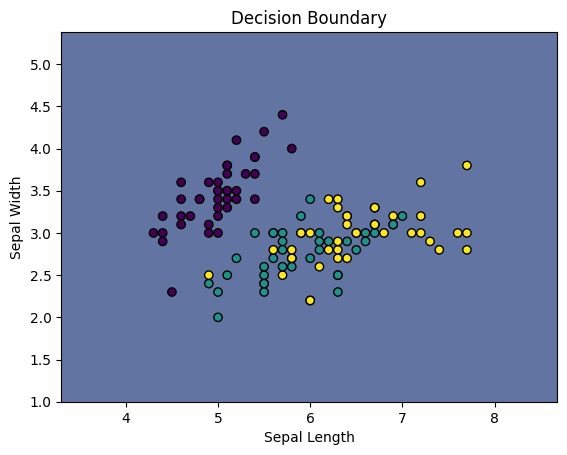

In [10]:
nn = NeuralNetwork(n_input, n_hidden, n_output)
nn.train(xtrain, ytrain, epochs=1000, learning_rate=0.1)
plot_decision_boundary(xtrain[:, :2], ytrain, nn)

#  Evaluate the model

In [11]:
y_pred_test = nn.predict(xtest)
accuracy = np.mean(y_pred_test == ytest)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9333333333333333


# Performance and Insights

In [12]:

print("Performance of the trained model:")
print(f"Accuracy: {accuracy}")

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(ytest, y_pred_test, average='weighted')
recall = recall_score(ytest, y_pred_test, average='weighted')
f1 = f1_score(ytest, y_pred_test, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Performance of the trained model:
Accuracy: 0.9333333333333333
Precision: 0.9333333333333333
Recall: 0.9333333333333333
F1-score: 0.9333333333333333
